In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# Thinkful Data Science Prep Capstone

## U.S. Net Foreign Investment And The Subprime Lending Crisis

- - - -


            Submitted By: AJ Igherighe   |   Completion Date: January 25, 2018

In [2]:
# Let's start by creating a chart to emphasize the abnormality of recent stock market returnss
# First we pull in historical S&P data
historical_returns_xl = pd.ExcelFile('./Data/historicalmarketreturns.xls')
sheetnames = list(historical_returns_xl.sheet_names)
sp_data = historical_returns_xl.parse(str(sheetnames[2]))
# sp_data.head()

# delete unnecessary columns
sp_cols = sp_data.columns
sp_data.drop(sp_data.columns[[4, 5]], axis=1, inplace=True)
# insert new column adding dividend value to S&P value
new_col = 'S&P_Full'
sp_data['S&P_Full'] = sp_data['S&P 500'] + sp_data['Dividends']
# sp_data.head()

# create the long term historical compounded annual growth rate (CAGR) for the S&P 500
years = int(len(sp_data[new_col][:]) - 1)
sp_start = float(sp_data[new_col][:1].copy())
sp_end = float(sp_data[new_col][-1:].copy())
total_return = sp_end / sp_start
cagr = (total_return ** (1 / years)) - 1
cagr_per = cagr * 100
# print("The S&P 500's 90 year Compounded Annual Growth Rate (CAGR) is {0:.2f}%".format(cagr_per))

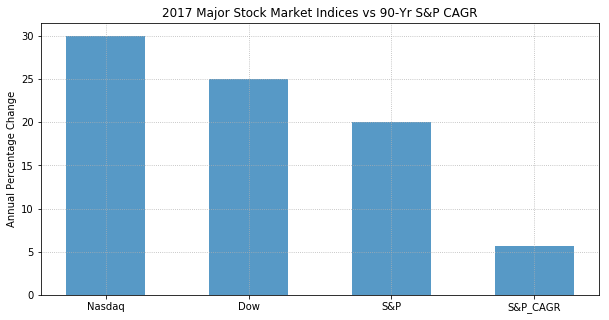

In [3]:
def create_barchart(data, values_column, xlabel, ylabel, title):
    """plot provided data into a bar chart"""
    fig = plt.figure(figsize=(10, 5))
    values = list(data[values_column])
    objects = (data.index)
    y_pos = np.arange(len(objects))
    bar_width = 0.55
    plt.bar(y_pos, values, bar_width, align='center', alpha=0.75)
    plt.xticks(y_pos, objects)
    # plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(linestyle='dotted')
    plt.show()

# 2017 stock market gains from cnn money and CAGR calculated from NYU data
stock_gains = {
    # dictionary with 2017 stock market index data
    'Index': ['Nasdaq', 'Dow', 'S&P', 'S&P_CAGR'], 
    'Returns': [30, 25, 20, cagr_per]
}

# create and sort dataframe from dictionary
df_gains = pd.DataFrame.from_dict(stock_gains)
df_gains.set_index(keys='Index', inplace=True)

# create chart using barchart function
xlabel = 'Indices'
ylabel = 'Annual Percentage Change'
graph_title = '2017 Major Stock Market Indices vs 90-Yr S&P CAGR'
data_column = 'Returns'

# run function to create bar graph
create_barchart(df_gains, data_column, xlabel, ylabel, graph_title)

**Figure 1: 2017 Returns By Major US Indices**




## Background

The United States is in the midst of an usually favorable economic period.  This is evidenced, in part, by the stock market experiencing its second longest bull market in recorded history.  U.S. major index returns in 2017 further support this point. To put this in perspective, Figure 1 compares 2017 returns of the major U.S. indexes to the S&P 500's compounded annual return since 1927.  Not only did the Nasdaq exceed this historical benchmark by nearly 6x, but the S&P itself earned a nearly 4x greater return than we would expect from its own historical performance. [1](http://money.cnn.com/2018/01/02/investing/stock-market-2018-outlook/index.html) [2](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)

  Preliminary research suggest the reasons for these gains are obvious:  
* **Lower Market Capitalizations Following The Great Recession**.  Triggered by what is now commonly called the "Subprime Mortgage Crisis," which arguably started with the bankruptcy of New Century in April 2007 [3](https://www.federalreservehistory.org/essays/subprime_mortgage_crisis), the US economy experienced its greatest retraction since the Great Depression.  In turn, the stock market experienced significant declines. As an example, the Dow Jones Industrial Average, a composite of the 30 largest public companies by market capitalization and considered by many investors as the least volatile stocks, lost 50% of its value between October 8, 2007 and March 5, 2009.  However, the United States was not affected alone.  Some experts estimate stock market losses worldwide from the crisis and subsequent recession could be nearly 10 trillion USD. [4](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp)

>> "Dozens of mortgage lenders declare bankruptcy in a matter of weeks. The market is filled with concerns of a major global credit crunch, which could affect all classes of borrowers. Central banks use emergency clauses to inject liquidity into scared financial markets. The real estate markets plummet after years of record highs. Foreclosure rates double year-over-year during the latter half of 2006 and in 2007." [5](https://www.investopedia.com/articles/07/subprime-overview.asp#ixzz54wBqEgCY)

* **A Massive Global Bailout, Stimulus, And Cheap Capital**.  Many argue with the actions taken to help institutions and homeowners during and following the subprime crisis.  However, Ryan Barnes' quote above (from an Investopedia article) paints a clear picture of how dire the situation appeared at the time.  Essentially, as markets panicked, concern emerged that, left unchecked, the subprime mortgage issue could spark a self-reinforcing liquidity crisis that could end in several key bankrupt financial institutions, and possibly even some governments.  By the time Lehman Brothers filed bankruptcy in Fall 2008 [4](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp), the US government, arguably, had little choice but to take several decisive actions:
  * Seize Fannie Mae and Freddie Mac to prevent their failure and to reassure the mortgage lending markets.  
  
  * Present programs to encourage banks to re-configure loans for deliquent borrowers and those with mortgages exceed their current home values rather than rush to foreclose.  
  
  * Lower short-term interest rates effectively to 0% to encourage banks to borrow and inject liquidity into the market.  
  
  * Purchase mortgage-backed securities and long-term bonds allowing troubled insitutions to strengthen their balance sheets, infusing liquidity into the market directly, and encouraging other financial institutions to provide additional liquidity by reducing longer-term interest rates. [3](https://www.federalreservehistory.org/essays/subprime_mortgage_crisis)  

Now, that it appears the US, and many other nations (see supplemental section), have recovered from The Great Recession [6](https://www.cbpp.org/research/economy/chart-book-the-legacy-of-the-great-recession) and that the U.S., Britain, and several other developed nations appear to be going through a nationalist backlash to globalization (the latter is based on the election of Donald Trump, "Brexit", and other events outside the scope of this analysis), it raises interesting questions about the past, present, and future of foreign investment in the United States.  Specifically:

   

  **What have U.S. net foreign investment trends been historically?**
 
  **Did it increase significantly in the periods leading up to the crisis as investors were largely unaware of the risks and financial institutions were earning signficant profits?**  

  **Following the crisis, has there been an obvious, permanent change in net foreign investment?**  



- - - -

## Following The Provided Capstone Methodology

To meet the requirements outlined in Unit 4 | Lesson 2 | Project 2, this *Analytic Report and Research Proposal* will follow these steps:

* **Describe the selected dataset**.  This analysis is conducted on U.S. Net Foreign Investment Data from the U.S. Department of Commerce's Bureau of Economic Analysis. [7](https://www.bea.gov/international/bp_web/tb_download_type_modern.cfm?list=2&RowID=144)


* **Ask and answer a set of analytical questions**. To the extent the data allows, we will address the three questions outlined at the end of the previous section.


* **Propose further research**. Finally, based on findings from the conducted analysis, the conclusion will contain ideas for additional exploration with skills and techniques from Thinkful's full bootcamp.

- - - -

## Exploring U.S. Net Investment Data

To answer the earlier posed questions, we will use data provided by the U.S. Department of Commerce's Bureaur of Economic Analysis.  This dataset contains annual information from 1976 to 2016 and quarterly information starting in 2006.  We are able to download the data in either .xls or .csv format.

For simplicity and speed, our preference is to work with the .csv formatted data.  However, after multiple failed attempts, we were forced to download the data in .xls.  A review of the file in a spreadsheet program quickly showed the problem.  To incorporate both annual and quarterly data in the same file, both the .csv and .xls had unusual formatting likely as a result of converting directly from Microsoft Excel.  

After removing the number of unnecessary leading columns and header rows, we were able to create a .xls file that Pandas could import.  Having solved overcoming our first hurdle, we can now prepare the data to answer our questions.

__ #1: What have U.S. net foreign investment trends been historically?__

In [4]:
def create_dataframe(csv_file):
    """read a supplied csv file and returns a pandas dataframe"""
    try:
        data = pd.read_csv(csv_file)
        return data.copy()
    except:
        print('Error reading csv file into dataframe.')

file = './Data/annual_invest_data.csv'
data_start = create_dataframe(file)
data_start.head()

,Line,Type of investment,1976,1977,1978,1979,1980,1981,1982,1983,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1,U.S. net international investment position (li...,80539,98585,128273,232250,296862,226992,238366,261494,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
1,2,Net international investment position excl...,80539,98585,128273,232250,296862,226992,238366,261494,...,-1350965,-4154938,-2753961,-2622170,-4541036,-4576076,-5450211,-7065777,-7549793,-8379684
2,3,"Financial derivatives other than reserves,...",n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,71472,159635,126335,110382,86039,57776,77557,85532,56314,61306
3,4,U.S. assets,371424,429060,526090,680460,839083,832943,1030358,1206656,...,20704503,19423416,19426459,21767827,22208896,22562162,24144775,24832583,23352371,23849445
4,5,Assets excluding financial derivatives (...,371424,429060,526090,680460,839083,832943,1030358,1206656,...,18145171,13295966,15936680,18115514,17492318,18942401,21127675,21580275,20924130,21640465


Answering our initial question, requires first locating the data with our dataset that best represents U.S. net foreign investment.  To make the data easier to deal with we will first drop the "Line" column which appears to be the original index.

In [5]:
# delete unnecessary index column
data_start.drop(data_start.columns[[0]], axis=1, inplace=True)
data_start.head()

,Type of investment,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,U.S. net international investment position (li...,80539,98585,128273,232250,296862,226992,238366,261494,140140,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
1,Net international investment position excl...,80539,98585,128273,232250,296862,226992,238366,261494,140140,...,-1350965,-4154938,-2753961,-2622170,-4541036,-4576076,-5450211,-7065777,-7549793,-8379684
2,"Financial derivatives other than reserves,...",n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,71472,159635,126335,110382,86039,57776,77557,85532,56314,61306
3,U.S. assets,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,...,20704503,19423416,19426459,21767827,22208896,22562162,24144775,24832583,23352371,23849445
4,Assets excluding financial derivatives (...,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,...,18145171,13295966,15936680,18115514,17492318,18942401,21127675,21580275,20924130,21640465


The second row of the dataframe (index 0) appears to contain the desired information - the historical difference between foreign investment in the U.S. and U.S. foreign borrowing.  To get the desired data, we will create a new dataframe from the top two rows and strip away the "Type Of Investment" column.  Then, we can plot this data to see if any insights emerge.

In [15]:
# create a new dataframe containing only the desired information
data_net = data_start.copy()
data_net.drop(data_net.columns[[0]], axis=1, inplace=True)
years_old = list(data_net.columns)
# print(data_net.head())
print(years_old)

['1976', '1977\xa0', '1978', '1979\xa0', '1980', '1981\xa0', '1982', '1983\xa0', '1984', '1985\xa0', '1986', '1987\xa0', '1988', '1989\xa0', '1990', '1991\xa0', '1992', '1993\xa0', '1994', '1995\xa0', '1996', '1997\xa0', '1998', '1999\xa0', '2000', '2001\xa0', '2002', '2003\xa0', '2004', '2005\xa0', '2006', '2007\xa0', '2008', '2009\xa0', '2010', '2011\xa0', '2012', '2013\xa0', '2014', '2015\xa0', '2016']


Column data contains formatting that will prevent properly plotting the data.

In [16]:
years_new = []
dirt = '\xa0'
for year in years_old:
    new_year = year.replace(dirt, '')
    years_new.append(new_year)
print(years_new)

['1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


A quick for loop allows us to strip away the problem formatting.  And let's us move on to preparing the graph.

In [35]:
data_net.iloc[0:1].to_csv('net_row.csv', header=False, index=False)
net_values = pd.read_csv('net_row.csv', header=None)
y = net_values.iloc[0]

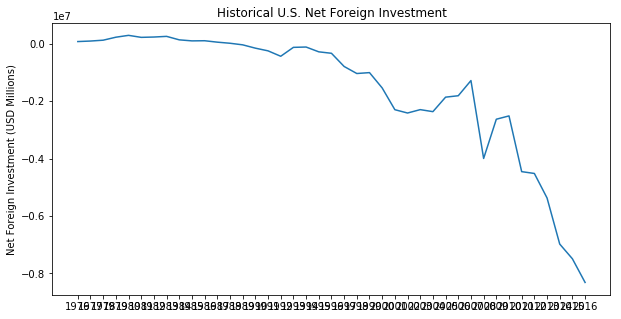

In [34]:
x = years_new
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.ylabel('Net Foreign Investment (USD Millions)')
plt.title('Historical U.S. Net Foreign Investment')
plt.show()

- - - -

**Supplemental Data**


https://www.bloomberg.com/news/articles/2017-08-31/canada-s-economy-surges-4-5-on-consumer-spending-key-takeaways

https://www.imf.org/en/News/Articles/2017/05/18/NA190517Latin-America-and-the-Caribbean-Bouncing-Back-from-Recession

http://www.globalissues.org/article/768/global-financial-crisis

https://www.investopedia.com/university/credit-crisis/credit-crisis6.asp

https://www.thebalance.com/stock-market-crash-of-2008-3305535

http://knowledge.wharton.upenn.edu/article/mortgage-crisis-bailout-relief-for-some-risk-for-others/

https://www.investopedia.com/terms/d/djia.asp

https://www.investopedia.com/terms/n/nasdaq100.asp,https://www.investopedia.com/ask/answers/040215/what-does-sp-500-index-measure-and-how-it-calculated.asp?ad=dirN&qo=investopediaSiteSearch&qsrc=0&o=40186